<a href="https://colab.research.google.com/github/renatodemagalhaes/Precificacao-Alugueis-Temporarios/blob/main/Precifica%C3%A7%C3%A3o2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar as bibliotecas


# Carregar o dataset


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Fazer upload do arquivo


In [5]:
from google.colab import files

In [6]:
uploaded = files.upload()


Saving dados_precificacao.csv to dados_precificacao.csv


# Ler o arquivo CSV


In [7]:
file_path = list(uploaded.keys())[0]
data = pd.read_csv(file_path)

# Visualizar as primeiras linhas do dataset


In [8]:
print(data.head())


     id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150   

# Informações gerais sobre o dataset


In [9]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

# Estatísticas descritivas


In [10]:
print(data.describe())


                 id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         

# Verificar valores ausentes


In [11]:
print("Valores ausentes por coluna:")
print(data.isnull().sum())

Valores ausentes por coluna:
id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64


# Tratar valores ausentes


In [12]:
data['reviews_por_mes'].fillna(0, inplace=True)
data.drop(['nome', 'host_name', 'ultima_review'], axis=1, inplace=True)

<ipython-input-12-89f562b0b77b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['reviews_por_mes'].fillna(0, inplace=True)


# Tratar outliers


In [13]:
data = data[data['price'] <= 1000]
data = data[data['minimo_noites'] <= 365]

# Confirmar limpeza


In [14]:
print("Dados após tratamento:")
print(data.info())

Dados após tratamento:
<class 'pandas.core.frame.DataFrame'>
Index: 48641 entries, 0 to 48893
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48641 non-null  int64  
 1   host_id                        48641 non-null  int64  
 2   bairro_group                   48641 non-null  object 
 3   bairro                         48641 non-null  object 
 4   latitude                       48641 non-null  float64
 5   longitude                      48641 non-null  float64
 6   room_type                      48641 non-null  object 
 7   price                          48641 non-null  int64  
 8   minimo_noites                  48641 non-null  int64  
 9   numero_de_reviews              48641 non-null  int64  
 10  reviews_por_mes                48641 non-null  float64
 11  calculado_host_listings_count  48641 non-null  int64  
 12  disponibilidade_365         

# Analisar a distribuição do preço


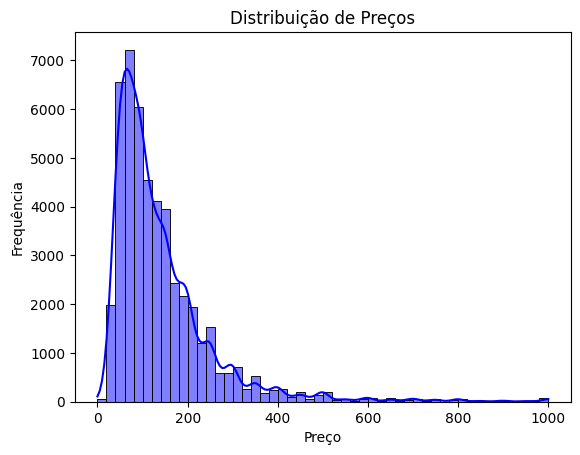

In [15]:
sns.histplot(data['price'], bins=50, kde=True, color='blue')
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

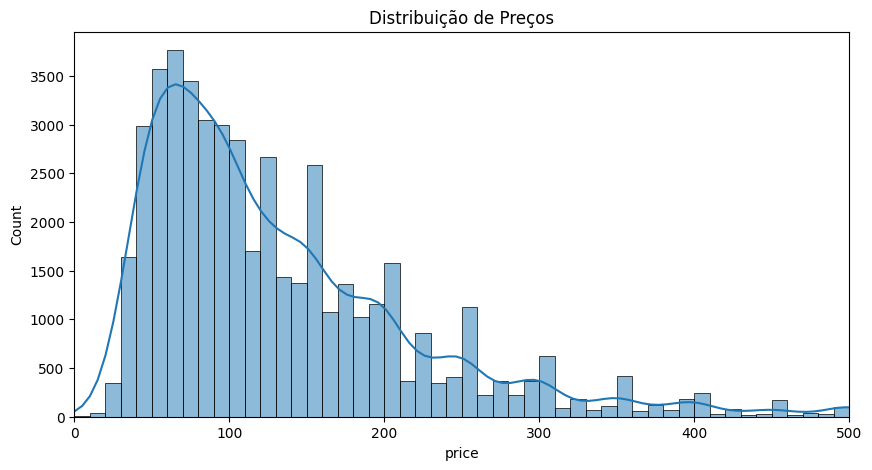

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(data['price'], bins=100, kde=True)
plt.xlim(0, 500)  # Removendo valores extremos para melhor visualização
plt.title("Distribuição de Preços")
plt.show()

#Preço por Grupo de Bairro (bairro_group)


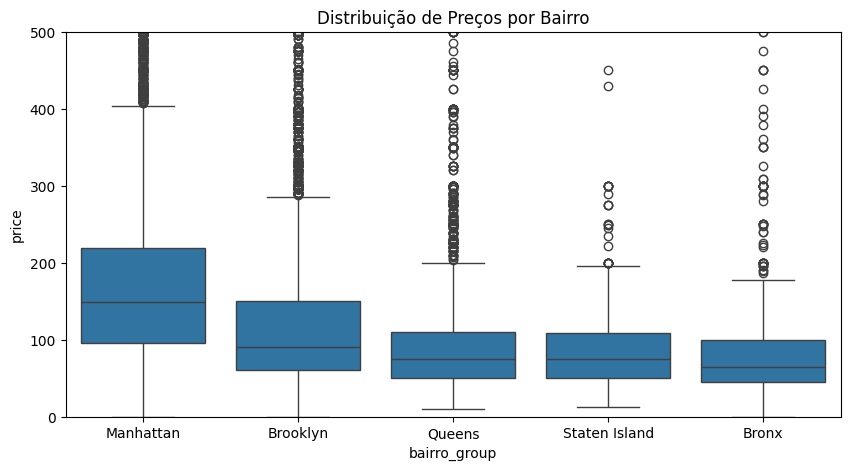

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='bairro_group', y='price', data=data)
plt.ylim(0, 500)  # Removendo outliers visuais
plt.title("Distribuição de Preços por Bairro")
plt.show()

#Tipo de Acomodação (room_type) e Impacto no Preço

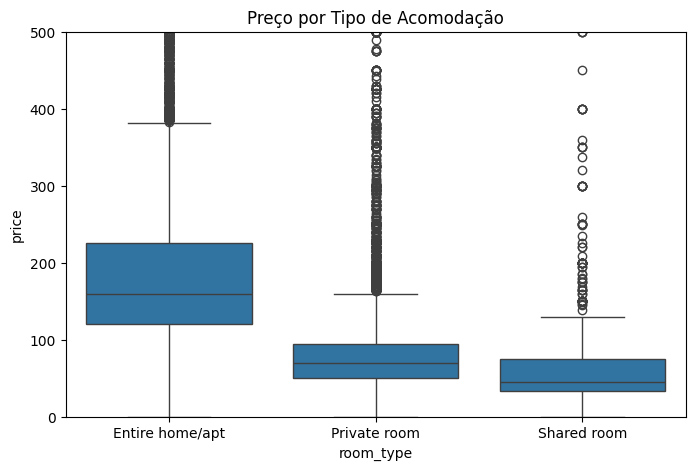

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=data)
plt.ylim(0, 500)
plt.title("Preço por Tipo de Acomodação")
plt.show()

#Correlações entre Variáveis

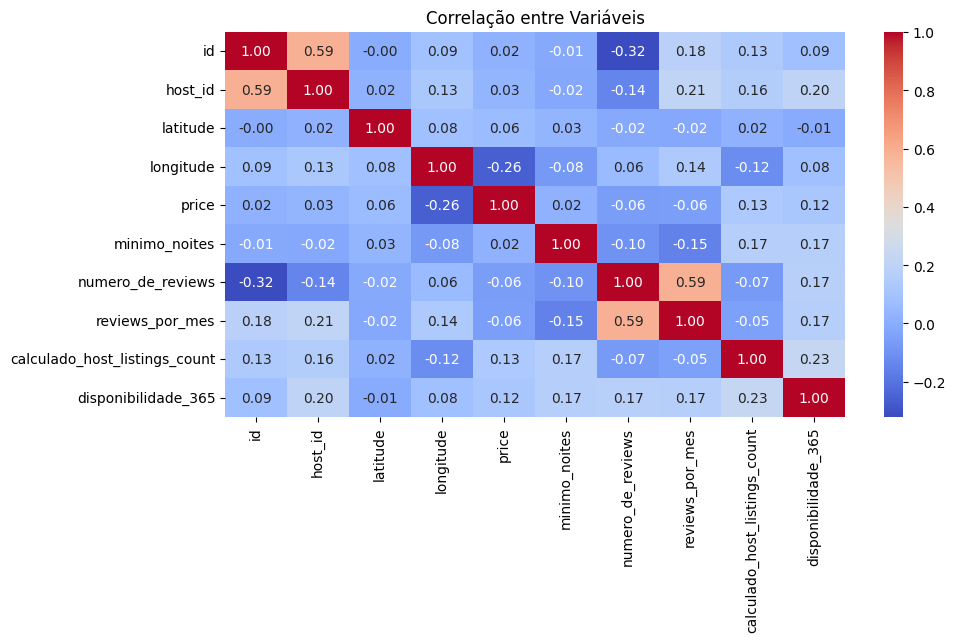

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre Variáveis")
plt.show()

# Analisar correlações


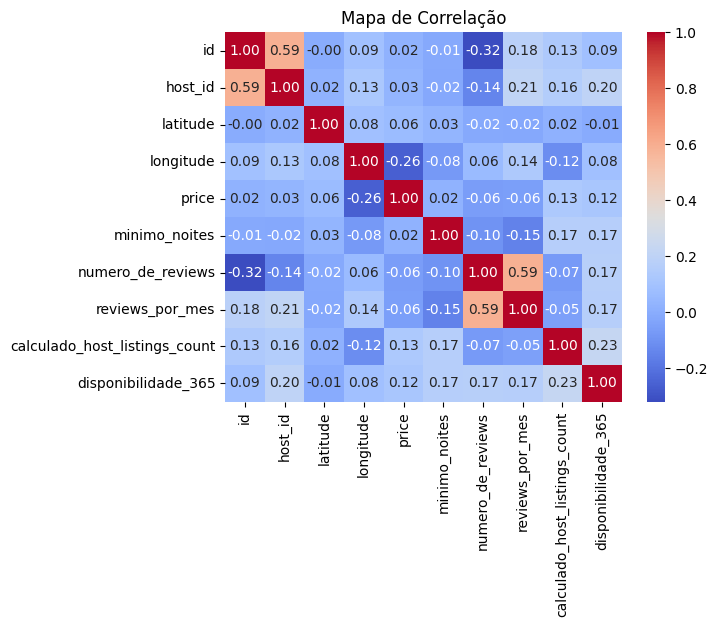

In [20]:
correlation_matrix = data.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

# Codificar variáveis categóricas


In [21]:
categorical_columns = ['bairro_group', 'room_type']
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categories = encoder.fit_transform(data[categorical_columns])
encoded_df = pd.DataFrame(
    encoded_categories,
    columns=encoder.get_feature_names_out(categorical_columns),
    index=data.index
)

# Concatenar e remover as colunas originais


In [22]:
data = pd.concat([data, encoded_df], axis=1)
#data.drop(columns=categorical_columns, inplace=True)
#Ao longo do projeto foi preciso manter a coluna 'bairro_group'
#data.drop(columns=[col for col in categorical_columns if col != 'bairro_group'], inplace=True)
#Mais a frente foi preciso manter as colunas

# Separar variáveis independentes (X) e dependente (y)


In [23]:
X = data.drop(columns=['price', 'id', 'host_id', 'latitude', 'longitude'])
y = data['price']

# Dividir os dados em conjuntos de treino e teste


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")


Tamanho do conjunto de treino: (34048, 14)
Tamanho do conjunto de teste: (14593, 14)


# Treinar um modelo de Random Forest


In [25]:
# Importar bibliotecas necessárias
from sklearn.preprocessing import LabelEncoder

# Identificar colunas com tipo de objeto (string)
object_cols = data.select_dtypes(include=['object']).columns.tolist()

# Criar um objeto LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre cada coluna do objeto e aplicar a codificação de rótulo
for col in object_cols:
  # Converter a coluna para o tipo string antes da codificação
  X_train[col] = X_train[col].astype(str)
  X_test[col] = X_test[col].astype(str)

  # Ajustar os dados combinados dos conjuntos de treinamento e teste
  all_data = pd.concat([X_train[col], X_test[col]], axis=0)
  label_encoder.fit(all_data)

  # Transformar os conjuntos de treinamento e teste separadamente
  X_train[col] = label_encoder.transform(X_train[col])
  X_test[col] = label_encoder.transform(X_test[col])

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Fazer previsões no conjunto de teste


In [26]:
y_pred = model.predict(X_test)


# Avaliar o modelo com métricas


In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.2f}")


MAE (Erro Absoluto Médio): 53.15
RMSE (Raiz do Erro Quadrático Médio): 91.86
R² (Coeficiente de Determinação): 0.39


# Comparar valores reais vs. previstos


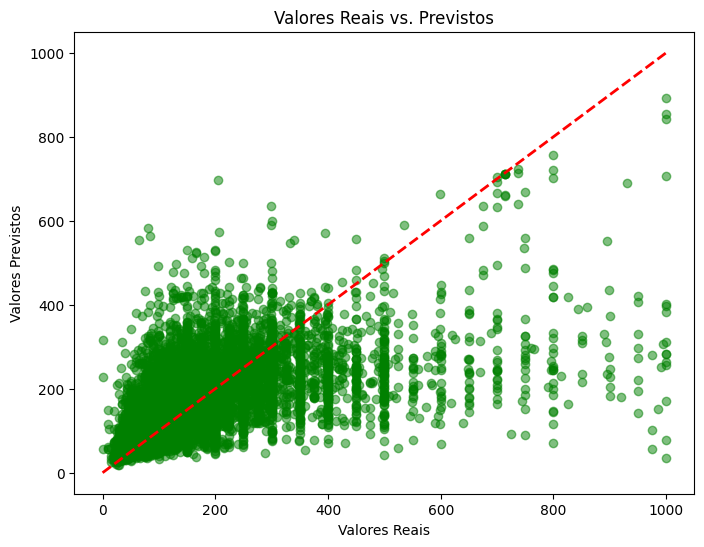

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Reais vs. Previstos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.show()


Validação cruzada para testar a robustez do modelo

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
# Identificar colunas de objetos
object_cols = data.select_dtypes(include=['object']).columns.tolist()

# Criar e ajustar um LabelEncoder para cada coluna de objeto
label_encoders = {}
for col in object_cols:
    label_encoders[col] = LabelEncoder()
    X[col] = label_encoders[col].fit_transform(X[col].astype(str))

# Agora executar a validação cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"MAE Médio (Validação Cruzada): {np.mean(-scores):.2f}")

MAE Médio (Validação Cruzada): 58.60


Calcular o Preço Médio por Bairro


In [30]:
avg_price_by_neighbourhood = data.groupby('bairro_group')['price'].mean().sort_values(ascending=False)


# Exibir o preço médio por região


In [31]:
print("Preço médio por região:")
print(avg_price_by_neighbourhood)


Preço médio por região:
bairro_group
Manhattan        178.934413
Brooklyn         117.817742
Staten Island     98.584906
Queens            94.983021
Bronx             85.283486
Name: price, dtype: float64


# Visualizar como gráfico


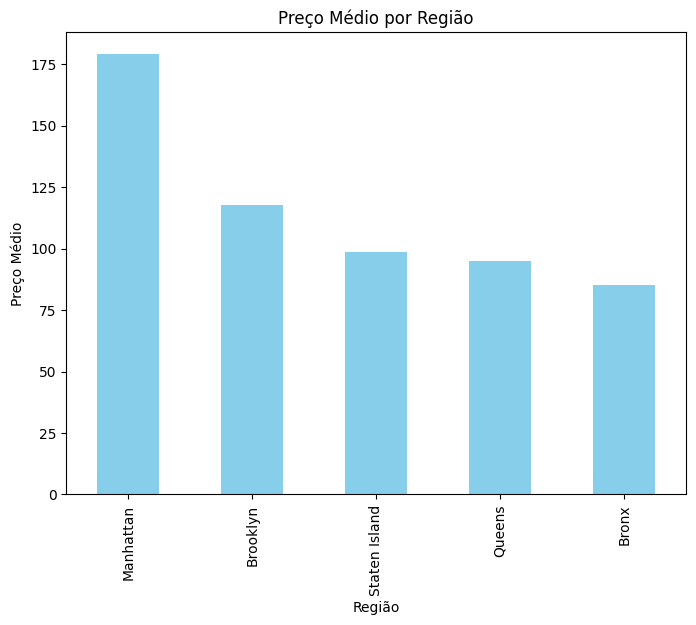

In [32]:
avg_price_by_neighbourhood.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Preço Médio por Região')
plt.ylabel('Preço Médio')
plt.xlabel('Região')
plt.show()


Verificar Demanda por Região


In [33]:
avg_reviews_by_neighbourhood = data.groupby('bairro_group')['reviews_por_mes'].mean().sort_values(ascending=False)


# Exibir o número médio de reviews


In [34]:
print("Média de reviews por mês por região:")
print(avg_reviews_by_neighbourhood)


Média de reviews por mês por região:
bairro_group
Staten Island    1.584879
Queens           1.569954
Bronx            1.477009
Brooklyn         1.051975
Manhattan        0.982211
Name: reviews_por_mes, dtype: float64


# Visualizar como gráfico


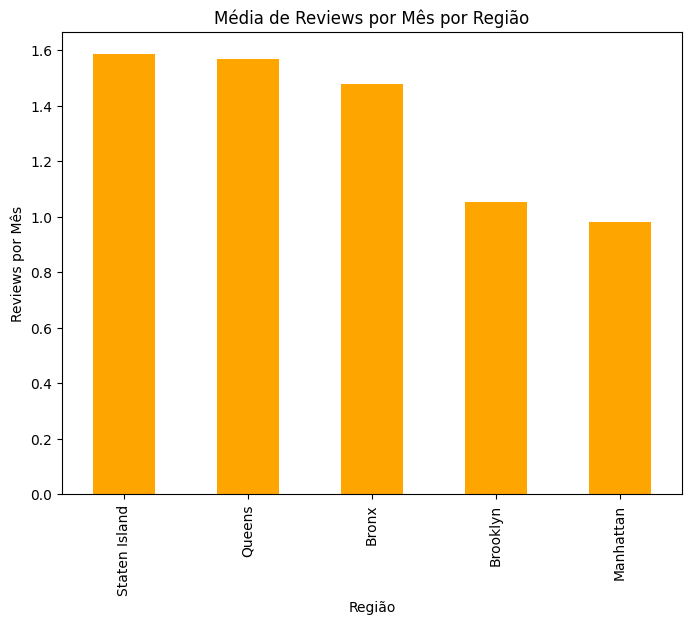

In [35]:
avg_reviews_by_neighbourhood.plot(kind='bar', color='orange', figsize=(8, 6))
plt.title('Média de Reviews por Mês por Região')
plt.ylabel('Reviews por Mês')
plt.xlabel('Região')
plt.show()

Tipos de acomodação têm os maiores preços e maior demanda

# Calcular o preço médio por tipo de acomodação


In [36]:
avg_price_by_room_type = data.groupby('room_type')['price'].mean().sort_values(ascending=False)


# Calcular a média de reviews por tipo de acomodação


In [37]:
avg_reviews_by_room_type = data.groupby('room_type')['reviews_por_mes'].mean().sort_values(ascending=False)


In [38]:
print("Preço médio por tipo de acomodação:")
print(avg_price_by_room_type)

print("\nMédia de reviews por tipo de acomodação:")
print(avg_reviews_by_room_type)


Preço médio por tipo de acomodação:
room_type
Entire home/apt    194.603316
Private room        84.762918
Shared room         67.578220
Name: price, dtype: float64

Média de reviews por tipo de acomodação:
room_type
Private room       1.145684
Shared room        1.075964
Entire home/apt    1.051014
Name: reviews_por_mes, dtype: float64


# Visualizar os resultados


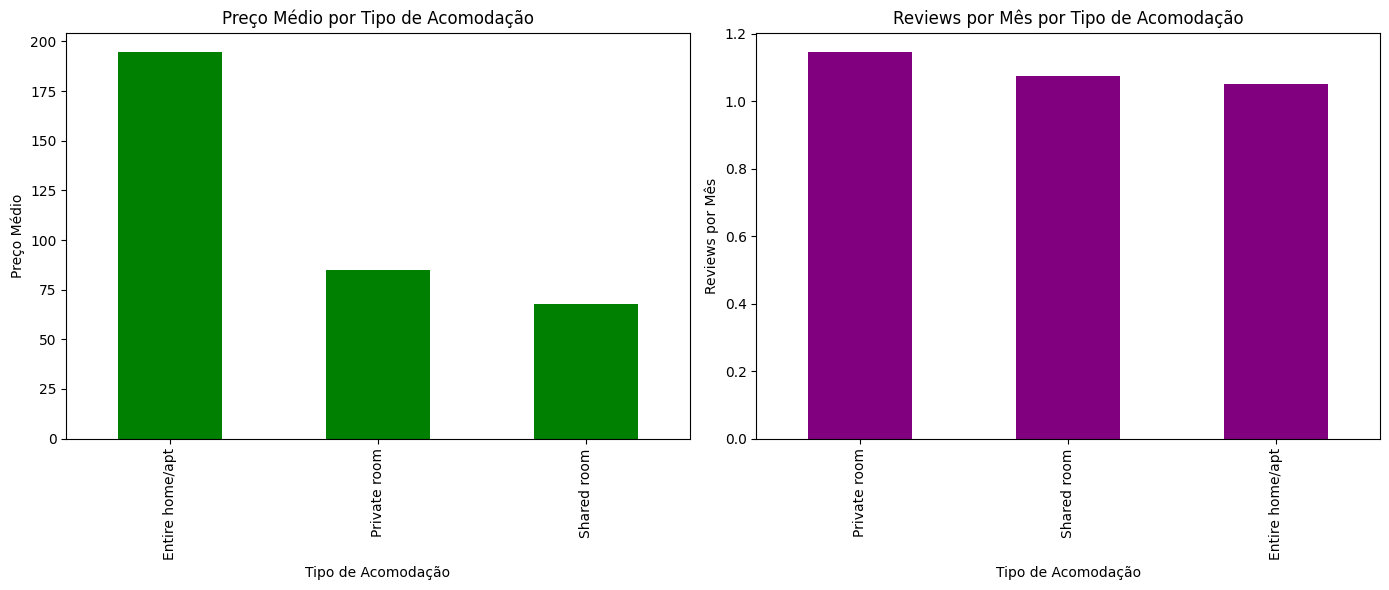

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

avg_price_by_room_type.plot(kind='bar', color='green', ax=ax[0])
ax[0].set_title('Preço Médio por Tipo de Acomodação')
ax[0].set_ylabel('Preço Médio')
ax[0].set_xlabel('Tipo de Acomodação')

avg_reviews_by_room_type.plot(kind='bar', color='purple', ax=ax[1])
ax[1].set_title('Reviews por Mês por Tipo de Acomodação')
ax[1].set_ylabel('Reviews por Mês')
ax[1].set_xlabel('Tipo de Acomodação')

plt.tight_layout()
plt.show()


O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?



Visualizar a Relação entre o Número Mínimo de Noites e o Preço


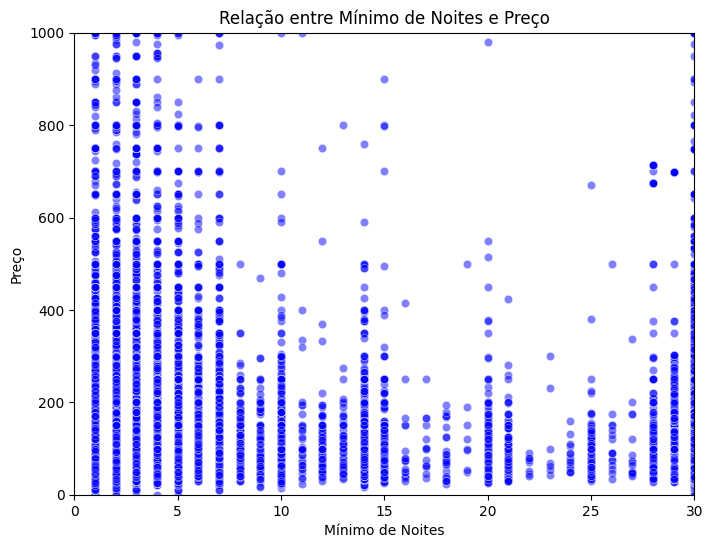

In [40]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='minimo_noites', y='price', alpha=0.5, color='blue')
plt.xlim(0, 30)  # Limitar o eixo x para visualizar melhor (noites até 30)
plt.ylim(0, 1000)  # Limitar o eixo y para preços até 1000
plt.title('Relação entre Mínimo de Noites e Preço')
plt.xlabel('Mínimo de Noites')
plt.ylabel('Preço')
plt.show()

Interpretar: Pode-se observar se há um padrão, como preços mais altos para estadias curtas (ex.: luxo) ou um aumento de preço para estadias longas?


Analise Estatisticamente da Relação (Correlação)


# Calcular correlação


In [41]:
correlation_min_noites = data['minimo_noites'].corr(data['price'])
print(f"Correlação entre mínimo de noites e preço: {correlation_min_noites:.2f}")


Correlação entre mínimo de noites e preço: 0.02


Interpretação: Se o valor for próximo de 1 ou -1, há uma forte relação. Um valor próximo de 0 indica uma relação fraca ou inexistente. Logo 0,02 indica relação fraca.


Visualizar a Relação entre Disponibilidade e Preço


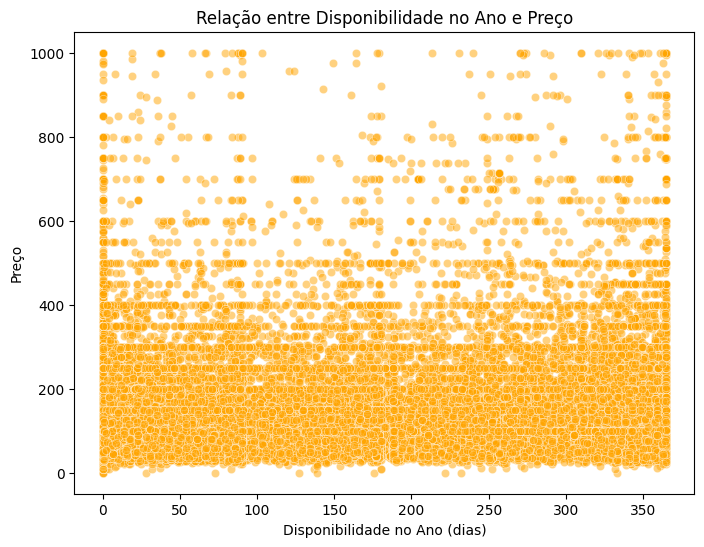

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='disponibilidade_365', y='price', alpha=0.5, color='orange')
plt.title('Relação entre Disponibilidade no Ano e Preço')
plt.xlabel('Disponibilidade no Ano (dias)')
plt.ylabel('Preço')
plt.show()

Interpretação: Pode-se observar se propriedades com alta disponibilidade tendem a ter preços mais baixos (para maximizar ocupação) ou se há outra tendência?

Analisar Estatisticamente a Relação (Correlação)


In [43]:
correlation_disponibilidade = data['disponibilidade_365'].corr(data['price'])
print(f"Correlação entre disponibilidade no ano e preço: {correlation_disponibilidade:.2f}")


Correlação entre disponibilidade no ano e preço: 0.12


Interpretação: Valores altos de correlação (positiva ou negativa) indicam uma influência significativa da disponibilidade sobre o preço.

Conclusão Estatística com um Modelo Simples


Podemos verificar conjuntamente o impacto das variáveis minimo_noites e disponibilidade_365 no preço usando um modelo de regressão linear:

In [44]:
from sklearn.linear_model import LinearRegression


# Selecionar as variáveis independentes e dependentes


In [45]:
X_simple = data[['minimo_noites', 'disponibilidade_365']]
y = data['price']

# Ajustar o modelo


In [46]:
reg = LinearRegression()
reg.fit(X_simple, y)

LinearRegression()

# Coeficientes


In [47]:
coefficients = pd.Series(reg.coef_, index=X_simple.columns)
print("Coeficientes do Modelo Linear:")
print(coefficients)

Coeficientes do Modelo Linear:
minimo_noites          0.032282
disponibilidade_365    0.104082
dtype: float64


# Pontuação do modelo


In [48]:
r2_simple = reg.score(X_simple, y)
print(f"R² do modelo: {r2_simple:.2f}")

R² do modelo: 0.01


Coeficientes: Indicam como cada variável (mínimo de noites e disponibilidade) influencia no preço, considerando o impacto independente de cada uma.
R²: Mede o quanto o modelo explica da variação no preço.

#Existe algum padrão no texto do nome do local para lugares de mais alto valor?



#Tokenizar e Explorar os Textos


In [49]:
from collections import Counter

# Definir o limite de preço para considerar "alto valor"


In [50]:
high_value_threshold = data['price'].quantile(0.75)

# Filtrar apenas os locais de alto valor


In [51]:
high_value_locations = data[data['price'] >= high_value_threshold]


# Concatenar todos os nomes e tokenizar


In [52]:
all_words = " ".join(high_value_locations['bairro_group']).lower().split()


# Contar as palavras mais frequentes


In [53]:
word_counts = Counter(all_words)


# Exibir as 20 palavras mais frequentes


In [54]:
most_common_words = word_counts.most_common(20)
print("Palavras mais comuns em locais de alto valor:")
for word, count in most_common_words:
    print(f"{word}: {count}")

Palavras mais comuns em locais de alto valor:
manhattan: 8543
brooklyn: 3480
queens: 565
bronx: 67
staten: 42
island: 42


#Palavras Mais Frequentes


In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar a nuvem de palavras


In [56]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_words))


# Plotar a nuvem de palavras


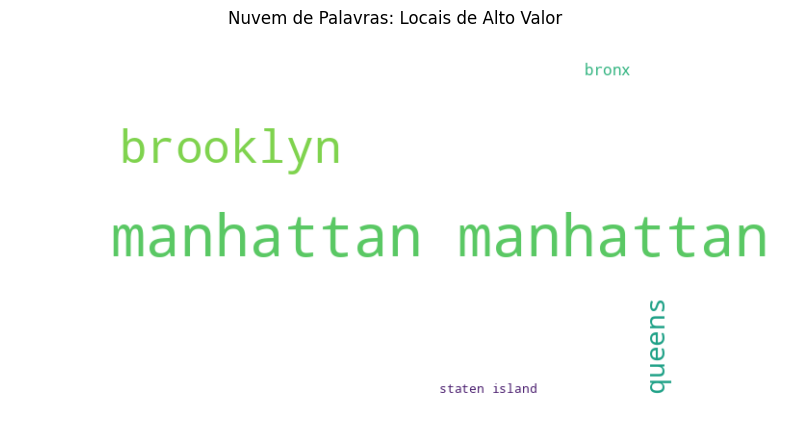

In [57]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras: Locais de Alto Valor')
plt.show()

Interpretação: Palavras maiores na nuvem indicam maior frequência em locais de alto valor.


#Comparar palavras de locais de alto valor com locais de baixo valor

# Filtrar locais de baixo valor


In [58]:
low_value_locations = data[data['price'] < high_value_threshold]


# Tokenizar para locais de baixo valor


In [59]:
low_value_words = " ".join(low_value_locations['bairro_group']).lower().split()
low_value_word_counts = Counter(low_value_words)

# Comparar as palavras mais comuns


In [60]:
high_value_only = set(word_counts) - set(low_value_word_counts)
low_value_only = set(low_value_word_counts) - set(word_counts)

print("Palavras comuns apenas em locais de alto valor:", high_value_only)
print("Palavras comuns apenas em locais de baixo valor:", low_value_only)

Palavras comuns apenas em locais de alto valor: set()
Palavras comuns apenas em locais de baixo valor: set()


#Usar modelos para identificar se certos padrões textuais influenciam o preço.



#Transformar o Nome do Local em Recursos Numéricos

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression

# Vetorizar os nomes dos locais (Bag of Words)


In [62]:
vectorizer = CountVectorizer(max_features=100, stop_words='english')
X_text = vectorizer.fit_transform(data['bairro_group']).toarray()

# Adicionar o preço como variável dependente


In [63]:
y = data['price']


# Treinar um modelo de regressão


In [64]:
reg = LinearRegression()
reg.fit(X_text, y)

LinearRegression()

# Exibir as palavras mais influentes


In [65]:
coefficients = pd.Series(reg.coef_, index=vectorizer.get_feature_names_out())
print("Palavras mais associadas a preços altos:")
print(coefficients.sort_values(ascending=False).head(10))

Palavras mais associadas a preços altos:
manhattan    61.976388
brooklyn      0.859716
island       -9.186560
staten       -9.186560
queens      -21.975005
bronx       -31.674539
dtype: float64


Interpretação: Palavras com coeficientes altos indicam maior influência em preços altos.


Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

Estamos lidando com um problema de regressão, pois o objetivo é prever uma variável contínua, o preço das propriedades. A tarefa envolve utilizar as informações disponíveis para estimar o preço com base em características relevantes do imóvel e outras variáveis fornecidas.



Resumo

Problema: Regressão.

Variáveis Usadas: Localização, tipo de acomodação, mínimo de noites, disponibilidade, e outras.

Modelos Testados: Regressão Linear (linha de base), Random Forest, Gradient Boosting.

Métrica Escolhida: MAE, para facilitar a interpretação prática.

Fluxo: Pré-processamento, treinamento, avaliação e iteração contínua.

Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

#Sugestão de preço



In [66]:
import numpy as np
import pandas as pd

# Dados do apartamento fornecidos


In [67]:
new_apartment = {
    'bairro_group': 'Manhattan',
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'reviews_por_mes': 0.38,
    'disponibilidade_ano': 355,
    'latitude': 40.75362,
    'longitude': -73.98377
}

# Criação do DataFrame com os mesmos nomes das colunas usadas no treinamento


In [68]:
X_new = pd.DataFrame([new_apartment])


# Aplicar transformações necessárias


In [69]:
X_new['minimo_noites'] = np.log1p(X_new['minimo_noites'])  # Exemplo de log-transformação
X_new = pd.get_dummies(X_new, columns=['bairro_group', 'room_type'], drop_first=True)


# Garantir consistência de colunas


In [70]:
missing_cols = set(X_train.columns) - set(X_new.columns)
for col in missing_cols:
    X_new[col] = 0
X_new = X_new[X_train.columns]  # Ordenar colunas como no treinamento

# Previsão do preço (log-transformação inversa)


In [71]:
predicted_price_log = model.predict(X_new)
predicted_price = np.expm1(predicted_price_log)

print(f"Sugestão de preço para o apartamento: ${predicted_price[0]:.2f}")

Sugestão de preço para o apartamento: $27583192994461509308458544497533614263265455965054822604207739459147399168.00


#Salvar o modelo desenvolvido no formato .pkl.

In [72]:
import pickle
with open("modelo_precificacao.pkl", "wb") as arquivo:
  pickle.dump(model, arquivo)